2018中職球隊分析
===
## 資料來源：[CPBL官網](http://www.cpbl.com.tw/cpbl.html)


In [146]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 $('input').val("顯示所有程式碼");
 } else {
 $('div.input').show();
 $('input').val("隱藏所有程式碼");
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="隱藏所有程式碼"></form>''')

In [278]:
import requests
import copy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
from matplotlib.font_manager import FontProperties
myfont = FontProperties(fname=r'./module/wqy-microhei.ttc') #設定中文字體


In [310]:
team=['Lamigo', '統一7-ELEVEn', '富邦', '中信兄弟']
teamCode=['A02','L01','B04','E02']
# teamStatiumScore: [自己][自己]:[總主場勝,總主場和,總主場敗,總客場勝,總客場和,總客場敗] #[自己][對手]:[主場勝,主場和,主場敗,客場勝,客場和,客場敗]
teamStatiumScore={'Lamigo': {'Lamigo': [0,0,0,0,0,0], '統一7-ELEVEn':  [0,0,0,0,0,0], '富邦':  [0,0,0,0,0,0], '中信兄弟':  [0,0,0,0,0,0]}, 
            '統一7-ELEVEn': {'Lamigo': [0,0,0,0,0,0], '統一7-ELEVEn':  [0,0,0,0,0,0], '富邦':  [0,0,0,0,0,0], '中信兄弟':  [0,0,0,0,0,0]},
                    '富邦': {'Lamigo': [0,0,0,0,0,0], '統一7-ELEVEn':  [0,0,0,0,0,0], '富邦':  [0,0,0,0,0,0], '中信兄弟':  [0,0,0,0,0,0]}, 
                '中信兄弟': {'Lamigo': [0,0,0,0,0,0], '統一7-ELEVEn':  [0,0,0,0,0,0], '富邦':  [0,0,0,0,0,0], '中信兄弟':  [0,0,0,0,0,0]}}
#依月份分類的teamStatiumScore
monthScore={'03月':copy.deepcopy(teamStatiumScore),'04月':copy.deepcopy(teamStatiumScore),'05月':copy.deepcopy(teamStatiumScore),'06月':copy.deepcopy(teamStatiumScore),'07月':copy.deepcopy(teamStatiumScore),'08月':copy.deepcopy(teamStatiumScore),'09月':copy.deepcopy(teamStatiumScore),'10月':copy.deepcopy(teamStatiumScore)}
monthName=['03月','04月','05月','06月','07月','08月','09月','10月']

In [308]:
'''輸入隊伍(0~3),2018與其他隊伍在主場客場勝和敗場次的數量'''
def createTeamStatiumScore(teamIndex):
    otherTeam=['Lamigo', '統一7-ELEVEn', '富邦', '中信兄弟']
    del otherTeam[teamIndex]
    res = requests.get("http://www.cpbl.com.tw/web/team_dayscore.php?&gameno=01&team={}&stype=&sbteamno=&syear=2018".format(teamCode[teamIndex]))# 抓資料頁面
    soup = BeautifulSoup(res.text)
    tableAll = soup.select('table')[0]
    for index,item in enumerate(tableAll.select('tr')):
        if index!=0:
            if item.select('td')[6].text==team[teamIndex]: # 如果 目標team 在主場
                if (int)(item.select('td')[7].text) > (int)(item.select('td')[5].text): 
                    # 如果在主場 目標team 勝
                    for tValue in team:
                        if item.select('td')[4].text==tValue:
                            teamStatiumScore[team[teamIndex]][tValue][0]+=1
                    teamStatiumScore[team[teamIndex]][team[teamIndex]][0]+=1;
                elif (int)(item.select('td')[5].text) == (int)(item.select('td')[7].text) : 
                    # 如果在主場 目標team 和
                    for tValue in team:
                        if item.select('td')[4].text==tValue:
                            teamStatiumScore[team[teamIndex]][tValue][1]+=1
                    teamStatiumScore[team[teamIndex]][team[teamIndex]][1]+=1;
                elif (int)(item.select('td')[7].text) < (int)(item.select('td')[5].text):
                    # 如果在主場 目標team 敗
                    for tValue in team:
                        if item.select('td')[4].text==tValue:
                            teamStatiumScore[team[teamIndex]][tValue][2]+=1
                    teamStatiumScore[team[teamIndex]][team[teamIndex]][2]+=1;
                else:
                    print("Error!")
            elif item.select('td')[4].text==team[teamIndex]: # 如果 目標team 在客場
                if (int)(item.select('td')[5].text) > (int)(item.select('td')[7].text):
                    # 如果在客場 目標team 勝
                    for tValue in team:
                        if item.select('td')[6].text==tValue:
                            teamStatiumScore[team[teamIndex]][tValue][3]+=1
                    teamStatiumScore[team[teamIndex]][team[teamIndex]][3]+=1;
                elif (int)(item.select('td')[5].text)==(int)(item.select('td')[7].text) :
                    # 如果在客場 目標team 和
                    for tValue in team:
                        if item.select('td')[6].text==tValue:
                            teamStatiumScore[team[teamIndex]][tValue][4]+=1
                    teamStatiumScore[team[teamIndex]][team[teamIndex]][4]+=1;
                elif (int)(item.select('td')[5].text) < (int)(item.select('td')[7].text):
                    # 如果在客場 目標team 敗
                    for tValue in team:
                        if item.select('td')[6].text==tValue:
                            teamStatiumScore[team[teamIndex]][tValue][5]+=1
                    teamStatiumScore[team[teamIndex]][team[teamIndex]][5]+=1;
                else:
                    print("error")
            else:
                print("ERROR!")


In [304]:
'''輸入隊伍(0~3)及月份(3~10),在指定月份與其他隊伍在主場客場勝和敗場次的數量'''
def createMonthScore(teamIndex,month):
    otherTeam=['Lamigo', '統一7-ELEVEn', '富邦', '中信兄弟']
    del otherTeam[teamIndex]
    res = requests.get("http://www.cpbl.com.tw/web/team_dayscore.php?&gameno=01&team={}&stype=&sbteamno=&syear=2018".format(teamCode[teamIndex]))# 抓資料頁面
    soup = BeautifulSoup(res.text)
    tableAll = soup.select('table')[0]
    #把monthScore某隊某月份每個element歸0   
    mm = monthName[month-3]
    #monthScore[mm]=teamStatiumScore #把monthScore某月份某隊伍每個element歸0
    monthScore[mm][team[teamIndex]]={'Lamigo': [0,0,0,0,0,0], '統一7-ELEVEn':  [0,0,0,0,0,0], '富邦':  [0,0,0,0,0,0], '中信兄弟':  [0,0,0,0,0,0]} 
    for index,item in enumerate(tableAll.select('tr')):
        if index!=0:
            dateMonth = ((item.select('td')[2].text.split('-'))[1]) +'月' # 抓出來的日期月份
            if dateMonth == mm:    #比賽月份＝＝對應輸入的月份
                if item.select('td')[6].text==team[teamIndex]: 
                # 如果 目標team 在主場
                    if (int)(item.select('td')[7].text) > (int)(item.select('td')[5].text):
                        # 如果在主場 目標team 勝
                        for tValue in team:
                            if item.select('td')[4].text==tValue:
                                monthScore[dateMonth][team[teamIndex]][tValue][0]+=1
                        monthScore[dateMonth][team[teamIndex]][team[teamIndex]][0]+=1;
                    elif (int)(item.select('td')[5].text) == (int)(item.select('td')[7].text) :
                        # 如果在主場 目標team 和
                        for tValue in team:
                            if item.select('td')[4].text==tValue:
                                monthScore[dateMonth][team[teamIndex]][tValue][1]+=1
                        monthScore[dateMonth][team[teamIndex]][team[teamIndex]][1]+=1;
                    elif (int)(item.select('td')[7].text) < (int)(item.select('td')[5].text):
                        # 如果在主場 目標team 敗
                        for tValue in team:
                            if item.select('td')[4].text==tValue:
                                monthScore[dateMonth][team[teamIndex]][tValue][2]+=1
                        monthScore[dateMonth][team[teamIndex]][team[teamIndex]][2]+=1;
                    else:
                        print("Error!")
                elif item.select('td')[4].text==team[teamIndex]: 
                # 如果 目標team 在客場
                    if (int)(item.select('td')[5].text) > (int)(item.select('td')[7].text):
                        # 如果在客場 目標team 勝
                        for tValue in team:
                            if item.select('td')[6].text==tValue:
                                monthScore[dateMonth][team[teamIndex]][tValue][3]+=1
                        monthScore[dateMonth][team[teamIndex]][team[teamIndex]][3]+=1;
                    elif (int)(item.select('td')[5].text)==(int)(item.select('td')[7].text) :
                        # 如果在客場 目標team 和
                        for tValue in team:
                            if item.select('td')[6].text==tValue:
                                monthScore[dateMonth][team[teamIndex]][tValue][4]+=1
                        monthScore[dateMonth][team[teamIndex]][team[teamIndex]][4]+=1;
                    elif (int)(item.select('td')[5].text) < (int)(item.select('td')[7].text):
                        # 如果在客場 目標team 敗
                        for tValue in team:
                            if item.select('td')[6].text==tValue:
                                monthScore[dateMonth][team[teamIndex]][tValue][5]+=1
                        monthScore[dateMonth][team[teamIndex]][team[teamIndex]][5]+=1;
                    else:
                        print("error")
                else:
                    print("ERROR!")

In [ ]:
'''呼叫createTeamStatiumScore方法, 把四隊2018在主客場勝和敗的場數存進teamStatiumScore裡'''
'''
for i in range(4):
    print(i)
    createTeamStatiumScore(i)
'''

In [ ]:
'''呼叫createMonthScore方法, 把四隊在3-10月中,主客場勝和敗的場數存進monthScore裡'''
'''
for i in range(4):
    for j in range(3,11):
        createMonthScore(i,j)
'''

In [312]:
'''四隊2018全年,主客場勝和敗的場數'''
teamStatiumScore={'Lamigo': {'Lamigo': [43, 0, 17, 30, 0, 30],'統一7-ELEVEn': [14, 0, 6, 10, 0, 10],'富邦': [13, 0, 7, 10, 0, 10],'中信兄弟': [16, 0, 4, 10, 0, 10]},
                    '統一7-ELEVEn': {'Lamigo': [10, 0, 10, 6, 0, 14],'統一7-ELEVEn': [36, 1, 23, 28, 0, 32],'富邦': [13, 0, 7, 13, 0, 7],'中信兄弟': [13, 1, 6, 9, 0, 11]},
                    '富邦': {'Lamigo': [10, 0, 10, 7, 0, 13],'統一7-ELEVEn': [7, 0, 13, 7, 0, 13],'富邦': [28, 0, 32, 26, 0, 34],'中信兄弟': [11, 0, 9, 12, 0, 8]},
                    '中信兄弟': {'Lamigo': [10, 0, 10, 4, 0, 16],'統一7-ELEVEn': [11, 0, 9, 6, 1, 13],'富邦': [8, 0, 12, 9, 0, 11],'中信兄弟': [29, 0, 31, 19, 1, 40]}}

In [313]:
'''四隊3-10月,各月份主客場勝和敗的場數'''
monthScore = {
    '03月': {'Lamigo': {'Lamigo': [2, 0, 0, 2, 0, 2],'統一7-ELEVEn': [0, 0, 0, 0, 0, 0],'富邦': [0, 0, 0, 1, 0, 1],'中信兄弟': [2, 0, 0, 1, 0, 1]},
            '統一7-ELEVEn': {'Lamigo': [0, 0, 0, 0, 0, 0],'統一7-ELEVEn': [1, 0, 0, 2, 0, 2],'富邦': [1, 0, 0, 1, 0, 1],'中信兄弟': [0, 0, 0, 1, 0, 1]},
            '富邦': {'Lamigo': [1, 0, 1, 0, 0, 0],'統一7-ELEVEn': [1, 0, 1, 0, 0, 1],'富邦': [2, 0, 2, 0, 0, 1],'中信兄弟': [0, 0, 0, 0, 0, 0]},
            '中信兄弟': {'Lamigo': [1, 0, 1, 0, 0, 2],'統一7-ELEVEn': [1, 0, 1, 0, 0, 0],'富邦': [0, 0, 0, 0, 0, 0],'中信兄弟': [2, 0, 2, 0, 0, 2]}},
    '04月': {'Lamigo': {'Lamigo': [10, 0, 4, 6, 0, 0],'統一7-ELEVEn': [4, 0, 1, 3, 0, 0],'富邦': [2, 0, 3, 0, 0, 0],'中信兄弟': [4, 0, 0, 3, 0, 0]},
            '統一7-ELEVEn': {'Lamigo': [0, 0, 3, 1, 0, 4],'統一7-ELEVEn': [8, 0, 5, 4, 0, 4],'富邦': [5, 0, 0, 3, 0, 0],'中信兄弟': [3, 0, 2, 0, 0, 0]},
            '富邦': {'Lamigo': [0, 0, 0, 3, 0, 2],'統一7-ELEVEn': [0, 0, 3, 0, 0, 5],'富邦': [4, 0, 4, 5, 0, 8],'中信兄弟': [4, 0, 1, 2, 0, 1]},
            '中信兄弟': {'Lamigo': [0, 0, 3, 0, 0, 4],'統一7-ELEVEn': [0, 0, 0, 2, 0, 3],'富邦': [1, 0, 2, 1, 0, 4],'中信兄弟': [1, 0, 5, 3, 0, 11]}},
    '05月': {'Lamigo': {'Lamigo': [5, 0, 3, 5, 0, 8],'統一7-ELEVEn': [2, 0, 0, 1, 0, 4],'富邦': [3, 0, 2, 3, 0, 2],'中信兄弟': [0, 0, 1, 1, 0, 2]},
            '統一7-ELEVEn': {'Lamigo': [4, 0, 1, 0, 0, 2],'統一7-ELEVEn': [9, 0, 2, 5, 0, 5],'富邦': [1, 0, 0, 3, 0, 0],'中信兄弟': [4, 0, 1, 2, 0, 3]},
            '富邦': {'Lamigo': [2, 0, 3, 2, 0, 3],'統一7-ELEVEn': [0, 0, 3, 0, 0, 1],'富邦': [3, 0, 7, 6, 0, 5],'中信兄弟': [1, 0, 1, 4, 0, 1]},
            '中信兄弟': {'Lamigo': [2, 0, 1, 1, 0, 0],'統一7-ELEVEn': [3, 0, 2, 1, 0, 4],'富邦': [1, 0, 4, 1, 0, 1],'中信兄弟': [6, 0, 7, 3, 0, 5]}},
    '06月': {'Lamigo': {'Lamigo': [5, 0, 1, 3, 0, 4],'統一7-ELEVEn': [2, 0, 1, 1, 0, 1],'富邦': [0, 0, 0, 1, 0, 2],'中信兄弟': [3, 0, 0, 1, 0, 1]},
            '統一7-ELEVEn': {'Lamigo': [1, 0, 1, 1, 0, 2],'統一7-ELEVEn': [3, 0, 2, 3, 0, 5],'富邦': [2, 0, 1, 0, 0, 2],'中信兄弟': [0, 0, 0, 2, 0, 1]},
            '富邦': {'Lamigo': [2, 0, 1, 0, 0, 0],'統一7-ELEVEn': [2, 0, 0, 1, 0, 2],'富邦': [6, 0, 2, 1, 0, 4],'中信兄弟': [2, 0, 1, 0, 0, 2]},
            '中信兄弟': {'Lamigo': [1, 0, 1, 0, 0, 3],'統一7-ELEVEn': [1, 0, 2, 0, 0, 0],'富邦': [2, 0, 0, 1, 0, 2],'中信兄弟': [4, 0, 3, 1, 0, 5]}},
    '07月': {'Lamigo': {'Lamigo': [5, 0, 3, 3, 0, 2],'統一7-ELEVEn': [2, 0, 1, 0, 0, 1],'富邦': [1, 0, 0, 2, 0, 0],'中信兄弟': [2, 0, 2, 1, 0, 1]},
            '統一7-ELEVEn': {'Lamigo': [1, 0, 0, 1, 0, 2],'統一7-ELEVEn': [1, 1, 3, 4, 0, 3],'富邦': [0, 0, 3, 2, 0, 0],'中信兄弟': [0, 1, 0, 1, 0, 1]},
            '富邦': {'Lamigo': [0, 0, 2, 0, 0, 1],'統一7-ELEVEn': [0, 0, 2, 3, 0, 0],'富邦': [1, 0, 6, 3, 0, 3],'中信兄弟': [1, 0, 2, 0, 0, 2]},
            '中信兄弟': {'Lamigo': [1, 0, 1, 2, 0, 2],'統一7-ELEVEn': [1, 0, 1, 0, 1, 0],'富邦': [2, 0, 0, 2, 0, 1],'中信兄弟': [4, 0, 2, 4, 1, 3]}},
    '08月': {'Lamigo': {'Lamigo': [2, 0, 3, 4, 0, 7],'統一7-ELEVEn': [1, 0, 1, 0, 0, 3],'富邦': [0, 0, 1, 2, 0, 3],'中信兄弟': [1, 0, 1, 2, 0, 1]},
            '統一7-ELEVEn': {'Lamigo': [3, 0, 0, 1, 0, 1],'統一7-ELEVEn': [5, 0, 3, 6, 0, 6],'富邦': [1, 0, 2, 3, 0, 2],'中信兄弟': [1, 0, 1, 2, 0, 3]},
            '富邦': {'Lamigo': [3, 0, 2, 1, 0, 0],'統一7-ELEVEn': [2, 0, 3, 2, 0, 1],'富邦': [5, 0, 6, 6, 0, 3],'中信兄弟': [0, 0, 1, 3, 0, 2]},
            '中信兄弟': {'Lamigo': [1, 0, 2, 1, 0, 1],'統一7-ELEVEn': [3, 0, 2, 1, 0, 1],'富邦': [2, 0, 3, 1, 0, 0],'中信兄弟': [6, 0, 7, 3, 0, 2]}},
    '09月': {'Lamigo': {'Lamigo': [10, 0, 2, 5, 0, 3],'統一7-ELEVEn': [2, 0, 1, 3, 0, 0],'富邦': [4, 0, 1, 1, 0, 1],'中信兄弟': [4, 0, 0, 1, 0, 2]},
            '統一7-ELEVEn': {'Lamigo': [0, 0, 3, 1, 0, 2],'統一7-ELEVEn': [6, 0, 6, 2, 0, 6],'富邦': [3, 0, 1, 1, 0, 2],'中信兄弟': [3, 0, 2, 0, 0, 2]},
            '富邦': {'Lamigo': [1, 0, 1, 1, 0, 4],'統一7-ELEVEn': [2, 0, 1, 1, 0, 3],'富邦': [4, 0, 5, 5, 0, 7],'中信兄弟': [1, 0, 3, 3, 0, 0]},
            '中信兄弟': {'Lamigo': [2, 0, 1, 0, 0, 4],'統一7-ELEVEn': [2, 0, 0, 2, 0, 3],'富邦': [0, 0, 3, 3, 0, 1],'中信兄弟': [4, 0, 4, 5, 0, 8]}},
    '10月': {'Lamigo': {'Lamigo': [4, 0, 1, 2, 0, 4],'統一7-ELEVEn': [1, 0, 1, 2, 0, 1],'富邦': [3, 0, 0, 0, 0, 1],'中信兄弟': [0, 0, 0, 0, 0, 2]},
            '統一7-ELEVEn': {'Lamigo': [1, 0, 2, 1, 0, 1],'統一7-ELEVEn': [3, 0, 2, 2, 0, 1],'富邦': [0, 0, 0, 0, 0, 0],'中信兄弟': [2, 0, 0, 1, 0, 0]},
            '富邦': {'Lamigo': [1, 0, 0, 0, 0, 3],'統一7-ELEVEn': [0, 0, 0, 0, 0, 0],'富邦': [3, 0, 0, 0, 0, 3],'中信兄弟': [2, 0, 0, 0, 0, 0]},
            '中信兄弟': {'Lamigo': [2, 0, 0, 0, 0, 0],'統一7-ELEVEn': [0, 0, 1, 0, 0, 2],'富邦': [0, 0, 0, 0, 0, 2],'中信兄弟': [2, 0, 1, 0, 0, 4]}
           }
}

In [314]:
'''輸入隊伍(0~3),畫出2018全年指定隊伍主客場勝和敗的場數,馬賽克磚圖'''
def drawStadiumPic(usrInputTeam):
    tColor=['#6DD9EC', '#FF884D', '#6B8CEA', '#FFCD00']
    mainColor=tColor[usrInputTeam]
    teamExcludeInput=['Lamigo', '統一7-ELEVEn', '富邦', '中信兄弟']
    teamExcludeInput.remove(teamExcludeInput[usrInputTeam])
    tColor.remove(tColor[usrInputTeam])
    # 把 teamStatiumScore(3row,6elements)存成barsize(6row,3elements)
    barsize=np.array([[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0]])
    for index,value in enumerate(teamExcludeInput):
        for j in range(6):
            barsize[j][index] = teamStatiumScore[team[usrInputTeam]][value][j]
    bar_width=1
    #由下至上畫出bar
    AL = plt.bar([0,1,2],barsize[5], bar_width,color=tColor,edgecolor='black',linewidth=3,alpha=0.3) 
    AT = plt.bar([0,1,2],barsize[4], bar_width,color='#A0A0A0',edgecolor='black',linewidth=3,alpha=0.3,bottom=barsize[5], hatch='////') 
    AW = plt.bar([0,1,2],barsize[3], bar_width,color=mainColor,edgecolor='black',linewidth=3,alpha=0.3,bottom=barsize[4]+barsize[5]) 
    HL = plt.bar([0,1,2],barsize[2], bar_width,color=tColor,edgecolor='green',linewidth=3,alpha=0.9,bottom=barsize[3]+barsize[4]+barsize[5]) 
    HT = plt.bar([0,1,2],barsize[1], bar_width,color='#A0A0A0',edgecolor='green',linewidth=3,alpha=1,bottom=barsize[2]+barsize[3]+barsize[4]+barsize[5], hatch='////') 
    HW = plt.bar([0,1,2],barsize[0], bar_width,color=mainColor,edgecolor='green',linewidth=3,alpha=0.9,bottom=barsize[1]+barsize[2]+barsize[3]+barsize[4]+barsize[5])
    plt.xticks(range(3), teamExcludeInput,fontproperties=myfont,size=14)
    plt.title("{}全年主客場與勝負關係".format(team[usrInputTeam]),fontproperties=myfont,size=20)
    marktype=['主場勝','主場和','主場敗','客場勝','客場和','客場敗']
    for xindex, xvalue in enumerate(barsize):
        height=[0,0,0]
        for i in range((xindex+1),6):
            height+=barsize[i]
        for yindex, yvalue in enumerate(xvalue):
            mark = marktype[xindex]+str(yvalue) if yvalue!=0 else ""
            plt.text(yindex-0.3 , yvalue/2+height[yindex]-0.3, mark,fontproperties=myfont,size=16)
    plt.text(-1.1,30,"主\n場",fontproperties=myfont,color='green',size=22)
    plt.text(-1.1,10,"客\n場",fontproperties=myfont,color='gray',size=22)
    #plt.legend() 
    plt.grid(False)
   

### 2018年整年,各隊在主客場的勝和敗次數

- 中職目前共有四隊，分別為Lamigo,統一獅,富邦,中信兄弟，一年中每個隊伍總比賽次數皆為120次，兩隊間個40次，其中在各自主場為20次。

- 選擇想看得隊伍，在下方表中，每一row可以看到與對手的主客場勝和敗次數，及所有對手全部加總的次數。

In [315]:
import ipywidgets as widgets

teamNumber={'Lamigo':0, '統一7-ELEVEn':1, '富邦':2, '中信兄弟':3}
dfInputTeam='Lamigo'
teamSelectDataFrame= widgets.Dropdown(
    options=['Lamigo', '統一7-ELEVEn', '富邦', '中信兄弟'],
    value=dfInputTeam,
    description='選擇隊伍:',
    disabled=False,
)
display(teamSelectDataFrame)
teamData=copy.deepcopy(teamStatiumScore[dfInputTeam])
for i in teamData:
    if i==dfInputTeam:
        teamData['全部加總'] = teamData.pop(dfInputTeam)
teamData_frame=pd.DataFrame(teamData, index=['主場勝','主場和','主場敗','客場勝','客場和','客場敗'])
display(HTML(teamData_frame.T.to_html()))
def on_value_change(change):
    clear_output()
    dfInputTeam= change['new']
    display(teamSelectDataFrame)
    '''畫指定隊伍全年主客場與勝負DataFrame表'''
    teamData=copy.deepcopy(teamStatiumScore[dfInputTeam])
    for i in teamData:
        if i==dfInputTeam:
            teamData['全部加總'] = teamData.pop(dfInputTeam)
    teamData_frame=pd.DataFrame(teamData, index=['主場勝','主場和','主場敗','客場勝','客場和','客場敗'])
    display(HTML(teamData_frame.T.to_html()))
    
teamSelectDataFrame.observe(on_value_change, names='value')

Dropdown(description='選擇隊伍:', options=('Lamigo', '統一7-ELEVEn', '富邦', '中信兄弟'), value='Lamigo')

,主場勝,主場和,主場敗,客場勝,客場和,客場敗
統一7-ELEVEn,14,0,6,10,0,10
富邦,13,0,7,10,0,10
中信兄弟,16,0,4,10,0,10
全部加總,43,0,17,30,0,30


### 2018中職各隊全年,在主客場勝和敗次數的馬賽克圖

- 可以從在主場時的勝率及在客場時的勝率差異，看出各隊的輸贏受主客場影響的程度。

- 我們可以發現Lamigo比賽的勝敗，比起其他三隊非常受到主客場影響。

- 我們也從下圖發現，富邦比起其他隊伍比較不受到主客場的影響，從這個結論我們接下來可以探討是否有其他因素影響比賽結果。



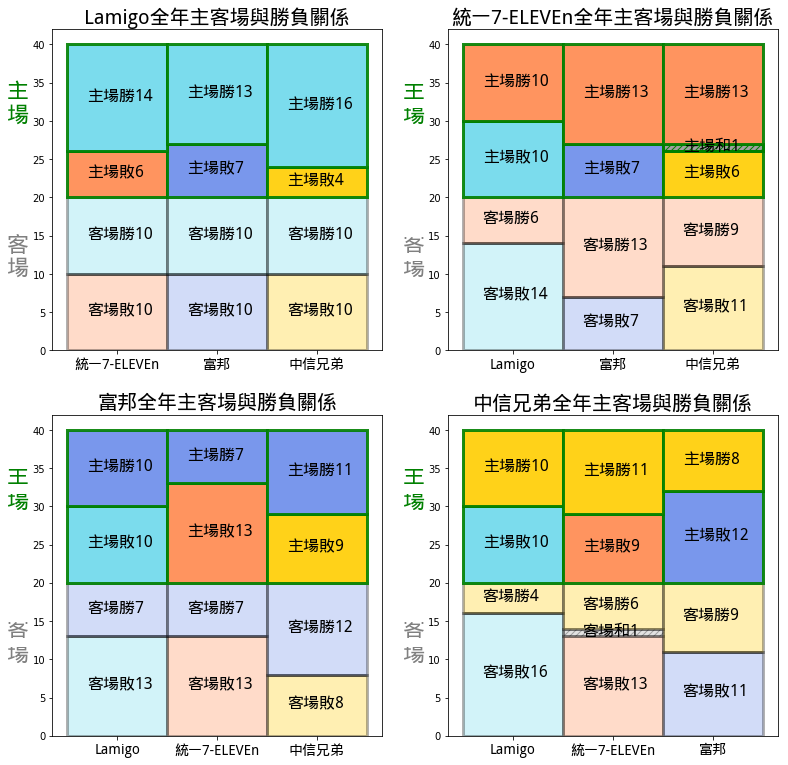

In [316]:
fig = plt.figure(figsize=(13, 13))
for i in range(4):
    plt.subplot(221+i)
    drawStadiumPic(i)
plt.show()

### 2018賽季期間(3-10月)逐月各隊輸贏次數

- 有鑒於每個月各隊的總比賽次數並不相同，所以下方長條圖單位除了次數以外，我們更應該去看的是逐月的百分比(下圖二)。

In [291]:
'''逐月勝利各隊的勝場數與敗場數'''
monthStatiumScore = {}
for mindex,m in enumerate(monthScore):
    for t in monthScore[m]:
        if monthStatiumScore.get(t)==None:
            monthStatiumScore[t]={"win":np.array([0,0,0,0,0,0,0,0]),"lose":np.array([0,0,0,0,0,0,0,0])}
        monthStatiumScore[t]["win"][mindex]=monthScore[m][t][t][0]+monthScore[m][t][t][3]
        monthStatiumScore[t]["lose"][mindex]=monthScore[m][t][t][2]+monthScore[m][t][t][5]      

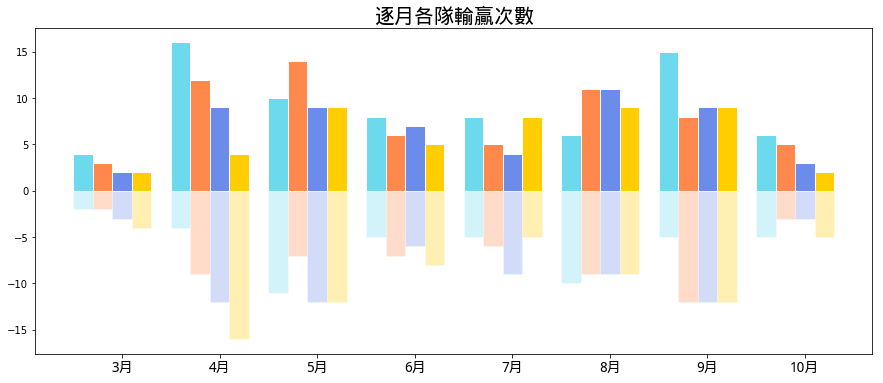

In [292]:
'''逐月各隊輸贏次數'''
fig = plt.figure(figsize=(15, 6))
X = np.arange(8)+3
bar_width=0.2
#tColor=['#6DD9EC', '#FF884D', '#6B8CEA', '#FFCD00']
plt.bar(X-0.4, monthStatiumScore['Lamigo']['win'],bar_width, facecolor='#6DD9EC', edgecolor='white')
plt.bar(X-0.4, -monthStatiumScore['Lamigo']['lose'],bar_width, facecolor='#6DD9EC',alpha=0.3, edgecolor='white')
plt.bar(X-0.2, monthStatiumScore['統一7-ELEVEn']['win'],bar_width, facecolor='#FF884D', edgecolor='white')
plt.bar(X-0.2, -monthStatiumScore['統一7-ELEVEn']['lose'],bar_width, facecolor='#FF884D',alpha=0.3, edgecolor='white')
plt.bar(X, monthStatiumScore['富邦']['win'],bar_width, facecolor='#6B8CEA', edgecolor='white')
plt.bar(X, -monthStatiumScore['富邦']['lose'],bar_width, facecolor='#6B8CEA',alpha=0.3, edgecolor='white')
plt.bar(X+0.2, monthStatiumScore['中信兄弟']['win'],bar_width, facecolor='#FFCD00', edgecolor='white')
plt.bar(X+0.2, -monthStatiumScore['中信兄弟']['lose'],bar_width, facecolor='#FFCD00',alpha=0.3, edgecolor='white')
plt.xticks(X, np.char.add(X.astype(str),"月") ,fontproperties=myfont,size=14)
plt.title("逐月各隊輸贏次數",fontproperties=myfont,size=20)
plt.show()

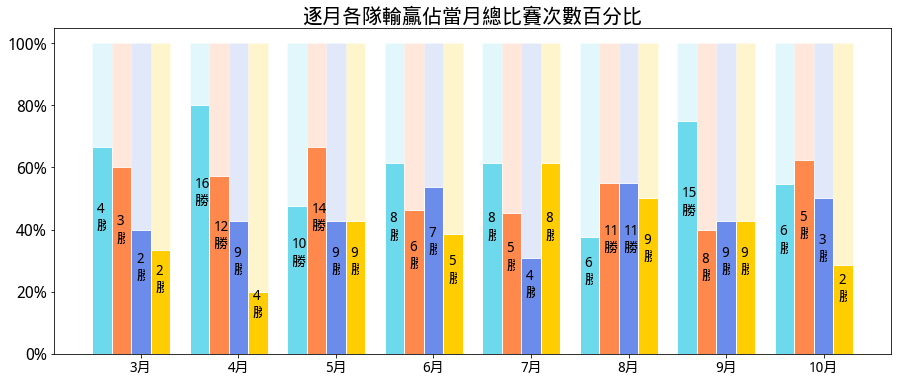

In [293]:
'''逐月各隊輸贏佔當月總比賽次數百分比'''
fig = plt.figure(figsize=(15, 6))
X = np.arange(8)+3
bar_width=0.2
tColor=['#6DD9EC', '#FF884D', '#6B8CEA', '#FFCD00']
for i in range(4):
    totalPlay=monthStatiumScore[team[i]]['win']+monthStatiumScore[team[i]]['lose']
    plt.bar(X-0.4+(0.2*i), np.around(100*(monthStatiumScore[team[i]]['win'])/totalPlay, decimals=2),bar_width, facecolor=tColor[i], edgecolor='white')
    plt.bar(X-0.4+(0.2*i), np.around(100*(monthStatiumScore[team[i]]['lose'])/totalPlay, decimals=2),bar_width, facecolor=tColor[i],alpha=0.2, edgecolor='white',bottom=np.around(100*(monthStatiumScore[team[i]]['win'])/totalPlay, decimals=2))
    for j in range(8):
        plt.text(j+2.55+(0.2*i), 60*monthStatiumScore[team[i]]['win'][j]/totalPlay[j], "{}\n勝".format(monthStatiumScore[team[i]]['win'][j]) ,fontproperties=myfont,size=14)
plt.xticks(X, np.char.add(X.astype(str),"月") ,fontproperties=myfont,size=14) 
plt.yticks(np.arange(0, 101, 20), np.char.add(np.arange(0, 101, 20).astype(str),"%"),fontproperties=myfont,size=16)
plt.title("逐月各隊輸贏佔當月總比賽次數百分比",fontproperties=myfont,size=20)
plt.show()

### 逐月各隊輸贏佔當月總比賽次數百分比

In [294]:
'''指定隊伍逐月勝利各隊的勝場數與敗場數'''
def teamMonthStatiumFun(userInput):
    team=['Lamigo', '統一7-ELEVEn', '富邦', '中信兄弟']
    tColor=['#6DD9EC', '#FF884D', '#6B8CEA', '#FFCD00']

    teamMonthStatiumScore = {}
    for mindex,m in enumerate(monthScore):
        for t in monthScore[m][team[userInput]]:
            if t!=team[userInput]:
                if teamMonthStatiumScore.get(t)==None:
                    teamMonthStatiumScore[t]={"win":np.array([0,0,0,0,0,0,0,0]),"lose":np.array([0,0,0,0,0,0,0,0])}
                teamMonthStatiumScore[t]["win"][mindex]=monthScore[m][team[userInput]][t][0]+monthScore[m][team[userInput]][t][3]
                teamMonthStatiumScore[t]["lose"][mindex]=monthScore[m][team[userInput]][t][2]+monthScore[m][team[userInput]][t][5]         
    '''Lamigo逐月與其他輸贏次數長條圖'''
    fig = plt.figure(figsize=(15, 6))
    X = np.arange(8)+3
    bar_width=0.2
    xpindex=0
    for i in range(4):
        if i!=userInput:
            xpindex+=1
            plt.bar(X-0.4+0.2*xpindex, teamMonthStatiumScore[team[i]]['win'],bar_width, facecolor=tColor[i], edgecolor='white')
            plt.bar(X-0.4+0.2*xpindex, -teamMonthStatiumScore[team[i]]['lose'],bar_width, facecolor=tColor[i],alpha=0.3, edgecolor='white')
    plt.xticks(X, np.char.add(X.astype(str),"月") ,fontproperties=myfont,size=14)
    plt.title("{}逐月與其他輸贏次數".format(team[userInput]),fontproperties=myfont,size=20)
    plt.show()

Dropdown(description='選擇隊伍:', options=('Lamigo', '統一7-ELEVEn', '富邦', '中信兄弟'), value='Lamigo')

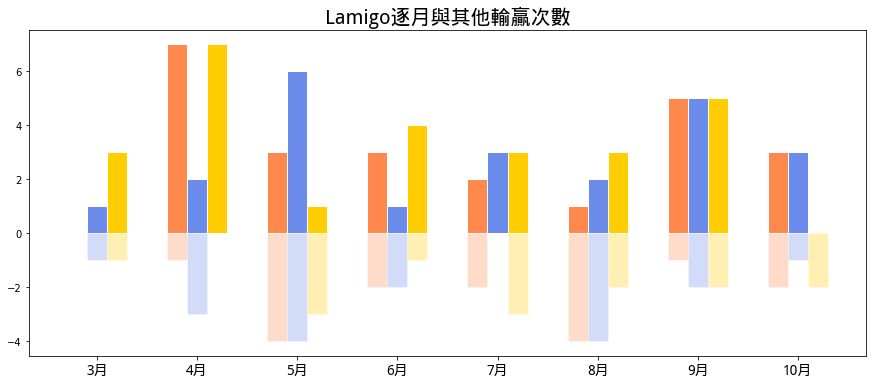

In [295]:
teamNumber={'Lamigo':0, '統一7-ELEVEn':1, '富邦':2, '中信兄弟':3}
inputTeam='Lamigo'
teamSelectMonth= widgets.Dropdown(
    options=['Lamigo', '統一7-ELEVEn', '富邦', '中信兄弟'],
    value=inputTeam,
    description='選擇隊伍:',
    disabled=False,
)
display(teamSelectMonth)
teamMonthStatiumFun(teamNumber[inputTeam])
def on_value_change(change):
    clear_output()
    inputTeam= change['new']
    display(teamSelectMonth)
    teamMonthStatiumFun(teamNumber[inputTeam])
teamSelectMonth.observe(on_value_change, names='value')

### 隊伍在某月份與其他隊的主客場勝和敗場數馬賽克圖

- 上方各隊輸贏佔當月比賽次數百分比長條圖，可以觀察到每個月的勝率是有變化的。我們可以從中去觀察特別高或特別低的隊伍及月份，再來於下方選擇想看的月份去找出影響勝率變化的關鍵，是否是因為比較不擅長面對某隊伍?或受主客場影響？

- 再來選擇某月的馬賽克圖去跟整年度的馬賽克圖去比較，如果是因為主客場影響，那麼在主場的勝率和在客場的勝率就會相似。

In [246]:
'''輸入隊伍(0~3),畫出指定隊伍,指定月份,主客場勝和敗的場數,馬賽克磚圖'''
def drawMonthStadiumPic(usrInputTeam,userInputMonth):
    tColor=['#6DD9EC', '#FF884D', '#6B8CEA', '#FFCD00']
    mainColor=tColor[usrInputTeam]
    teamExcludeInput=['Lamigo', '統一7-ELEVEn', '富邦', '中信兄弟']
    teamExcludeInput.remove(teamExcludeInput[usrInputTeam])
    tColor.remove(tColor[usrInputTeam])
    # 把 teamStatiumScore(3row,6elements)存成barsize(6row,3elements)
    barsize=np.array([[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0]])
    for index,value in enumerate(teamExcludeInput):
        for j in range(6):
            barsize[j][index] = monthScore[userInputMonth][team[usrInputTeam]][value][j]
    bar_width=1
    #由下至上畫出bar
    AL = plt.bar([0,1,2],barsize[5], bar_width,color=tColor,edgecolor='black',linewidth=3,alpha=0.3) 
    AT = plt.bar([0,1,2],barsize[4], bar_width,color='#A0A0A0',edgecolor='black',linewidth=3,alpha=0.3,bottom=barsize[5], hatch='////') 
    AW = plt.bar([0,1,2],barsize[3], bar_width,color=mainColor,edgecolor='black',linewidth=3,alpha=0.3,bottom=barsize[4]+barsize[5]) 
    HL = plt.bar([0,1,2],barsize[2], bar_width,color=tColor,edgecolor='green',linewidth=3,alpha=0.9,bottom=barsize[3]+barsize[4]+barsize[5]) 
    HT = plt.bar([0,1,2],barsize[1], bar_width,color='#A0A0A0',edgecolor='green',linewidth=3,alpha=1,bottom=barsize[2]+barsize[3]+barsize[4]+barsize[5], hatch='////') 
    HW = plt.bar([0,1,2],barsize[0], bar_width,color=mainColor,edgecolor='green',linewidth=3,alpha=0.9,bottom=barsize[1]+barsize[2]+barsize[3]+barsize[4]+barsize[5])
    plt.xticks(range(3), teamExcludeInput,fontproperties=myfont,size=14)
    plt.title("{}2018/{}主客場與勝負關係".format(team[usrInputTeam],userInputMonth),fontproperties=myfont,size=20)
    marktype=['主場勝','主場和','主場敗','客場勝','客場和','客場敗']
    for xindex, xvalue in enumerate(barsize):
        height=[0,0,0]
        for i in range((xindex+1),6):
            height+=barsize[i]
        for yindex, yvalue in enumerate(xvalue):
            mark = marktype[xindex]+str(yvalue) if yvalue!=0 else ""
            plt.text(yindex-0.3 , yvalue/2+height[yindex]-0.3, mark,fontproperties=myfont,size=16)
    #plt.legend() 
    plt.grid(False)
    

Dropdown(description='選擇隊伍:', index=5, options=('03月', '04月', '05月', '06月', '07月', '08月', '09月', '10月'), value…

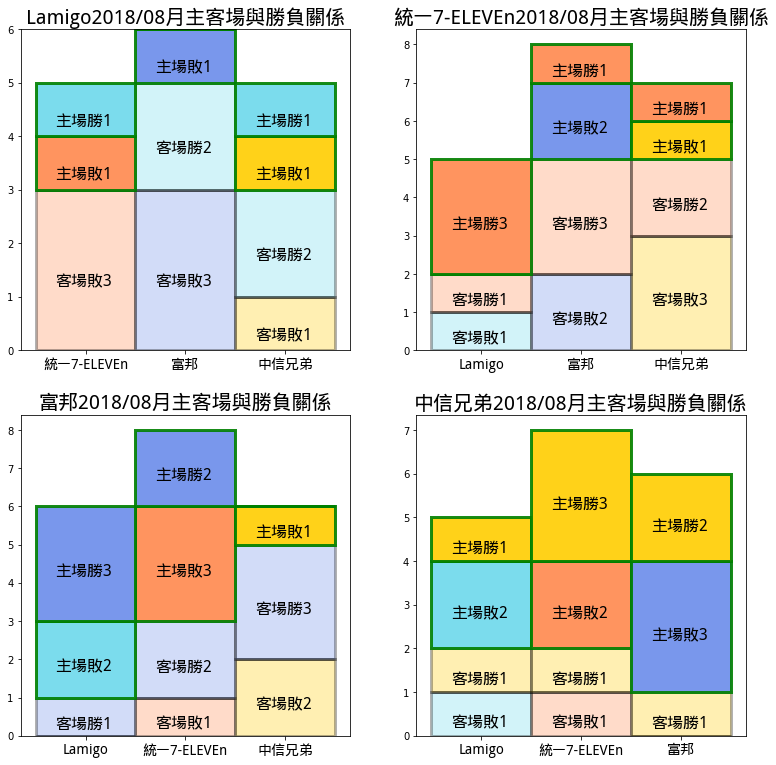

In [296]:
teamNumber={'Lamigo':0, '統一7-ELEVEn':1, '富邦':2, '中信兄弟':3}
inputMonth='03月'
monthSelect= widgets.Dropdown(
    options=['03月','04月','05月','06月','07月','08月','09月','10月'],
    value=inputMonth,
    description='選擇隊伍:',
    disabled=False,
)
display(monthSelect)
fig = plt.figure(figsize=(13, 13))
for i in range(4):
    plt.subplot(221+i)
    drawMonthStadiumPic(i,inputMonth)
plt.show()

def on_value_change(change):
    clear_output()
    inputMonth= change['new']
    display(monthSelect)
    fig = plt.figure(figsize=(13, 13))
    for i in range(4):
        plt.subplot(221+i)
        drawMonthStadiumPic(i,inputMonth)
    plt.show()
monthSelect.observe(on_value_change, names='value')